##### 1. Now we know how to solve the problem of

$$\mathbf{y}=A\mathbf{\theta}$$

Once we obtain

$$\mathbf{\theta}=\begin{bmatrix} a \\ b \end{bmatrix}$$

We can use these two parameters to predict $y$ for any new $x$, this is known as `regression` problem

Next, we will see how we can push this method further to do `classification` problem

Assume we have the following data points

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
plt.style.use('dark_background')

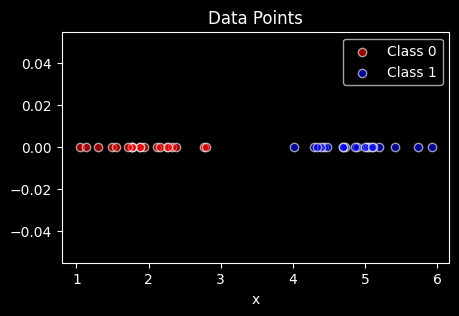

In [ ]:
np.random.seed(42)

# Generate data for class 0 (centered around 2)
mean_class0 = 2
std_class0 = 0.5
num_points = 20
class0_data = np.random.normal(mean_class0, std_class0, num_points)  # shape (20,)

# Generate data for class 1 (centered around 5)
mean_class1 = 5
std_class1 = 0.5
class1_data = np.random.normal(mean_class1, std_class1, num_points)  # shape (20,)

# Combine data
x = np.concatenate([class0_data, class1_data])  # shape (40,)
y = np.array([0] * num_points + [1] * num_points)  # shape (40,)

# Plot data
plt.figure(figsize=(5, 3))
plt.scatter(class0_data, np.zeros(num_points), color='red', label='Class 0', alpha=0.6, edgecolors='w')
plt.scatter(class1_data, np.zeros(num_points), color='blue', label='Class 1', alpha=0.6, edgecolors='w')

plt.xlabel('x')
plt.title('Data Points')
plt.legend()
# plt.grid(True)
plt.show()

Here, the idea is that each point has one feature, the value of $x$, and characteristics of each point is either class 0 or class 1 (you can think of 0 being non-diabete, and 1 being diabete).

Mathmatically, the output of each data point is no longer a `continuous` variable, but a `discrete` value of either 0 or 1.

So, how can we use what we learned to solve this problem?

Ideally, we would like something like the following

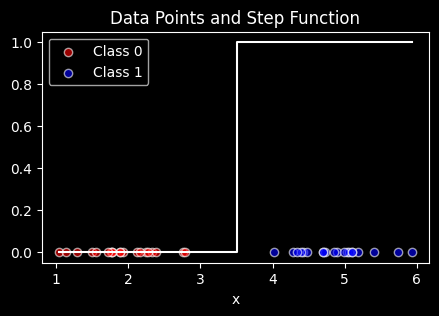

In [ ]:
# Plot data
plt.figure(figsize=(5, 3))
plt.scatter(class0_data, np.zeros(num_points), color='red', label='Class 0', alpha=0.6, edgecolors='w')
plt.scatter(class1_data, np.zeros(num_points), color='blue', label='Class 1', alpha=0.6, edgecolors='w')

# Plot step function
plt.plot([min(x), 3.5, 3.5, max(x)], [0, 0, 1, 1], color='w')

plt.xlabel('x')
plt.title('Data Points and Step Function')
plt.legend()
# plt.grid(True)
plt.show()

This is a `step function` where it is 0 at class 0's region, and 1 at class 1's region

However, there can be potential issue with the step function, as it has two sharp corners where the value is undefined

To remove this issue, all we really need is a function looks like the following

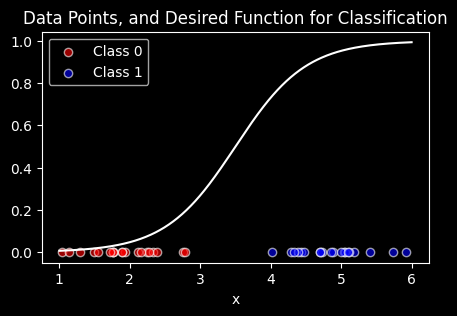

In [ ]:
x_values = np.linspace(1, 6, 400)
logistic_values = 1 / (1 + np.exp(-2 * (x_values - 3.5)))

# Plot data
plt.figure(figsize=(5, 3))
plt.scatter(class0_data, np.zeros(num_points), color='red', label='Class 0', alpha=0.6, edgecolors='w')
plt.scatter(class1_data, np.zeros(num_points), color='blue', label='Class 1', alpha=0.6, edgecolors='w')

# Plot logistic function
plt.plot(x_values, logistic_values, color='w')

plt.xlabel('x')
plt.title('Data Points, and Desired Function for Classification')
plt.legend()
# plt.grid(True)
plt.show()

This function is larger than 0.5 for class 1 and smaller than 0.5 for class 0

it is also constrained within (0, 1), so, we can treat it as `probability` that a data belongs to class 1

How can we get this curve? It turns out, we can use the following `sigmoid` function

$$h(y_{\text{pred},i})=\frac{1}{1+e^{-y_{\text{pred},i}}}=\frac{1}{1+e^{-ax_i-b}}$$

##### 2. Now we need to derive the cost function $J$ that will be minimized to get $a$ and $b$

Two types of $J$ are possible. The first one is similar to the one used in our regression problem, instead of

$$J=\frac{1}{m}\sum_{i=0}^{m}\,(y_{\text{pred},i}-y_{\text{act},i})^2$$

We changed it to

$$J=\frac{1}{m}\sum_{i=0}^{m}\,\left(h(y_{\text{pred},i})-y_{\text{act},i}\right)^2$$


* Input $x$
* Linear regression $y_{\text{pred}}=ax+b$
* Convert to probability $h(y_{\text{pred}})=\frac{1}{1+e^{-y_{\text{pred}}}}$

Squared difference loss for `one sample`

$$J=\left(h(y_{\text{pred}})-y_{\text{act}}\right)^2$$

where $y_{\text{act}}$ is either 1 or 0

`This cost function will only be used in this notebook`

Differentiate $J$ with respect to $h(y_{\text{pred}})$

$$\frac{dJ}{dh(y_{\text{pred}})}=2\left(h(y_{\text{pred}})-y_{\text{act}}\right)$$

Differentiate $J$ with respect to $y_{\text{pred}}$ using chain rule

$$\begin{align*}
\frac{dJ}{dy_{\text{pred}}}&=\frac{dJ}{dh(y_{\text{pred}})}\cdot \frac{dh(y_{\text{pred}})}{dy_{\text{pred}}}\\
&=2\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot -h(y_{\text{pred}})^2\cdot \left(1-\frac{1}{h(y_{\text{pred}})}\right)\\
&=2\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot h(y_{\text{pred}})\cdot \left(1-h(y_{\text{pred}})\right)
\end{align*}$$

Differentiate $J$ with respect to $a$ using chain rule (2 is dropped for clarity, it won't affect finding $a$ and $b$)

$$\begin{align*}
\frac{dJ}{da}&=\frac{dJ}{dy_{\text{pred}}}\cdot \frac{dy_{\text{pred}}}{da}\\
&=\color{red}{\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot h(y_{\text{pred}})\cdot \left(1-h(y_{\text{pred}})\right)\cdot x}
\end{align*}$$

Similarly

$$\begin{align*}
\frac{dJ}{db}&=\frac{dJ}{dy_{\text{pred}}}\cdot \frac{dy_{\text{pred}}}{db}\\
&=\color{red}{\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot h(y_{\text{pred}})\cdot \left(1-h(y_{\text{pred}})\right)\cdot 1}
\end{align*}$$

Next, we put everything into algorithm

Iteration 0: Loss = 0.25
Iteration 1000: Loss = 0.1034223795896078
Iteration 2000: Loss = 0.06276945282038102
Iteration 3000: Loss = 0.04481514718943175
Iteration 4000: Loss = 0.034989607859926455
Iteration 5000: Loss = 0.028831955340160816
Iteration 6000: Loss = 0.024614790095192456
Iteration 7000: Loss = 0.021542940671037968
Iteration 8000: Loss = 0.019202373590885915
Iteration 9000: Loss = 0.017357036358650647


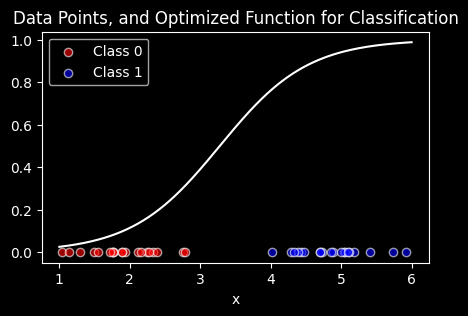

In [ ]:
# Initial guess
a = 0
b = 0
learning_rate = 0.05
num_iterations = 10000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Store loss values
loss_values = []

# Training loop
for i in range(num_iterations):
    # Forward pass
    y_pred = a * x + b  # shape (40,)
    h_pred = sigmoid(y_pred)  # shape (40,)

    # Compute squared loss
    loss = np.mean((y - h_pred) ** 2)  # scalar

    loss_values.append(loss)

    # Compute gradients
    da = np.mean((h_pred - y) * h_pred * (1-h_pred) * x)  # scalar
    db = np.mean((h_pred - y) * h_pred * (1-h_pred) * 1)

    # Update parameters
    a -= learning_rate * da
    b -= learning_rate * db

    # Print loss
    if i % 1000 == 0:
        print(f'Iteration {i}: Loss = {loss}')

decision_boundary_x = np.linspace(1, 6, 400)
decision_boundary_y = sigmoid((a * x_values + b))

# Plot data
plt.figure(figsize=(5, 3))
plt.scatter(class0_data, np.zeros(num_points), color='red', label='Class 0', alpha=0.6, edgecolors='w')
plt.scatter(class1_data, np.zeros(num_points), color='blue', label='Class 1', alpha=0.6, edgecolors='w')

# Plot logistic function
plt.plot(decision_boundary_x, decision_boundary_y, color='w')

plt.xlabel('x')
plt.title('Data Points, and Optimized Function for Classification')
plt.legend()
# plt.grid(True)
plt.show()